In [1]:
# import pandas library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as snsimport matplotlib.pyplot as plt

In [2]:
# Reading csv file
df = pd.read_csv("E:\\datasets_dsbda\\heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.shape

(303, 14)

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [7]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.isnull().sum() 

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [9]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [10]:
#data cleaning 
df.duplicated().sum()

np.int64(1)

In [11]:
df = df.drop_duplicates()

In [12]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
#data integration 
subSet1 = df[['age','cp','chol','thalachh']]

In [16]:
subSet2 = df[['exng','slp','output']]

In [17]:
concat = pd.concat([subSet1, subSet2], axis=1)

In [18]:
concat.head()

,age,cp,chol,thalachh,exng,slp,output
0,63,3,233,150,0,0,1
1,37,2,250,187,0,0,1
2,41,1,204,172,0,2,1
3,56,1,236,178,0,2,1
4,57,0,354,163,1,2,1


In [19]:
#eRROR CORRECTION
def remove_outliers(column):
    Q1 = column.quantile(0.25)           # 25th percentile (lower quartile)
    Q3 = column.quantile(0.75)           # 75th percentile (upper quartile)
    IQR = Q3 - Q1                        # Interquartile range
    threshold = 1.5 * IQR                # Outlier threshold (standard multiplier)
    
    # Create a mask for values that are NOT outliers
    outlier_mask = (column < Q1 - threshold) | (column > Q3 + threshold)
    
    # Return column values excluding outliers
    return column[~outlier_mask]


In [20]:
# Remove outliers for each column using a loop
col_name = ['cp','thalachh','exng','oldpeak','slp','caa']
for col in col_name:
    df[col] = remove_outliers(df[col])

In [21]:
df = df.dropna(subset=col_name)

In [22]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Correlation with the Target:
age        -0.193798
sex        -0.303271
cp          0.410807
trtbps     -0.135238
chol       -0.052796
fbs        -0.026650
restecg     0.122071
thalachh    0.384609
exng       -0.444401
oldpeak    -0.437895
slp         0.329432
caa        -0.460816
thall      -0.366390
Name: output, dtype: float64



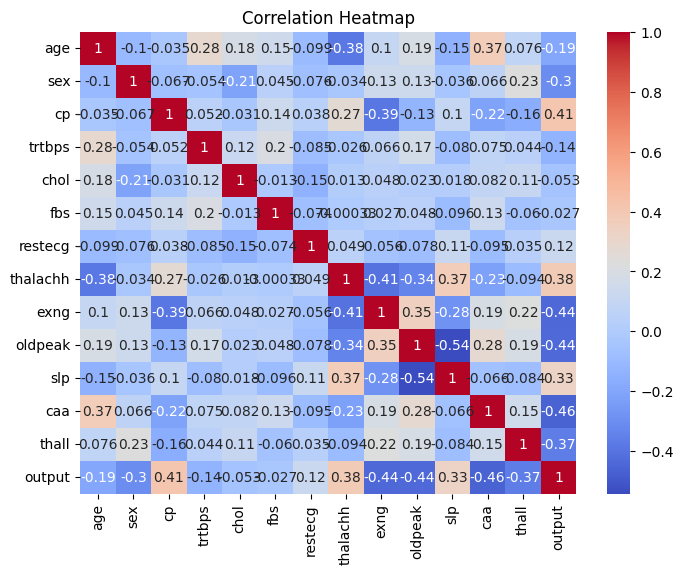

In [23]:
import matplotlib.pyplot as plt
# Compute correlations between features and target
correlations = df.corr()['output'].drop('output')

# Print correlations
print("Correlation with the Target:")
print(correlations)
print()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# splitting data using train test split
x = df[['cp','thalachh','exng','oldpeak','slp','caa']]
y = df.output
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((220, 6), (55, 6), (220,), (55,))

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [28]:

x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [29]:
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test_scaled)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8363636363636363


Text(0.5, 1.0, 'Correlation Heatmap')

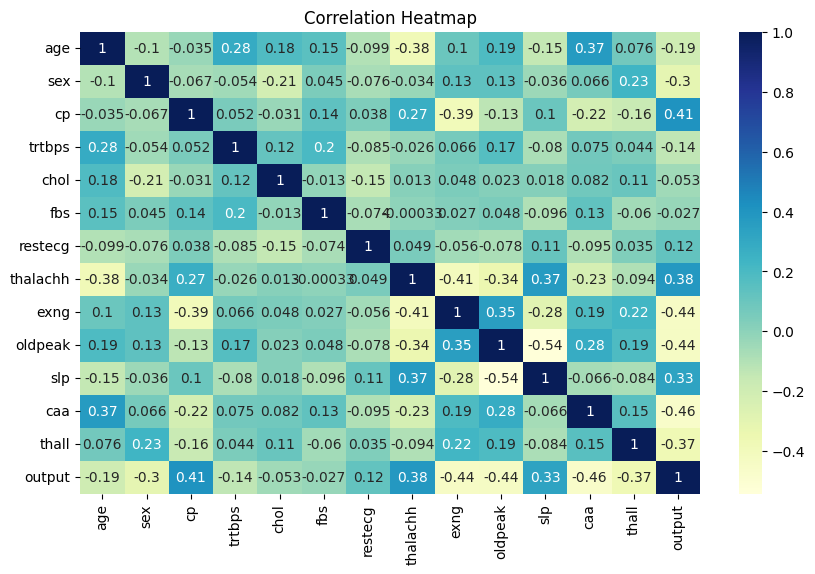

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap = 'YlGnBu', annot = True)
plt.title("Correlation Heatmap")

Text(0.5, 1.0, 'Age vs Chest Pain (by Output)')

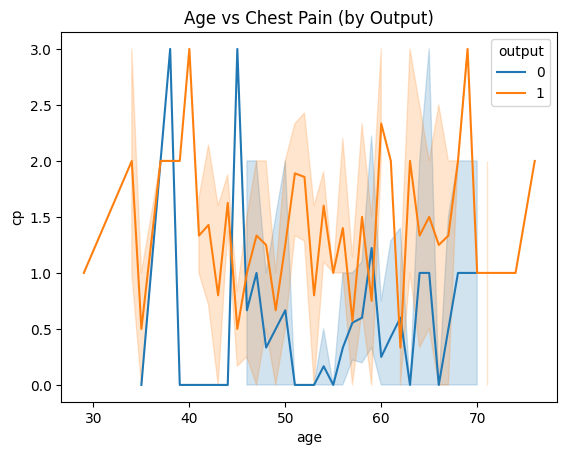

In [36]:
# Line plot 1: Age vs Chest Pain type
sns.lineplot(data=df, x='age', y='cp', hue='output')
plt.title("Age vs Chest Pain (by Output)")

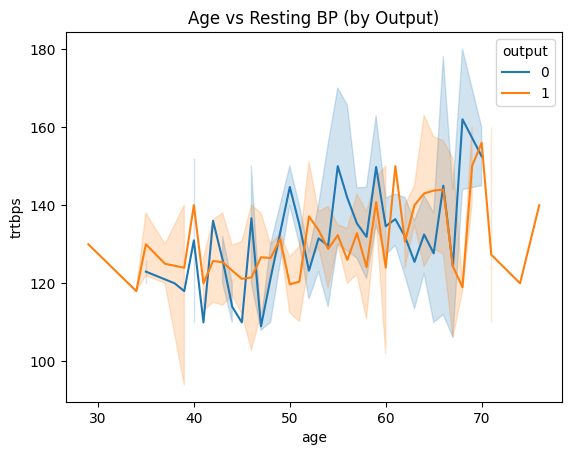

In [38]:
sns.lineplot(data=df, x='age', y='trtbps', hue='output')
plt.title("Age vs Resting BP (by Output)")
plt.show()

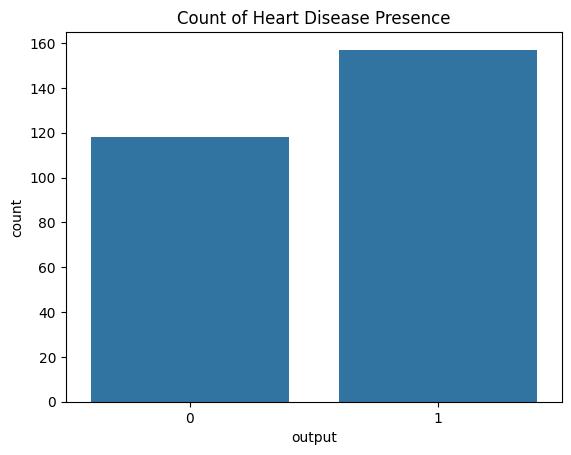

In [39]:
sns.countplot(x='output', data=df)
plt.title("Count of Heart Disease Presence")
plt.show()
